In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from cwgp.cwgp import CWGP
from cwgp.kernel import RBF
import GPy
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
CSV_FIlE = "japan3.csv"
df = pd.read_csv(CSV_FIlE)
age = 50
df_all = {}
df_all[age]= df[(df["age"]==age)]

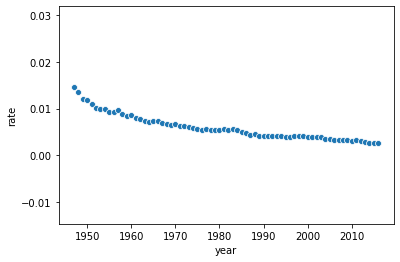

In [5]:
sns.scatterplot(df_all[age]["year"],df_all[age]["rate"])

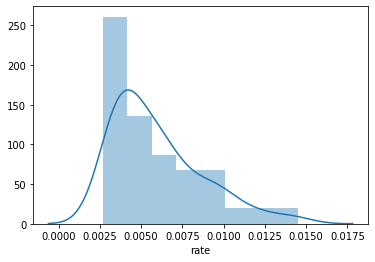

In [6]:
sns.distplot(df_all[age]["rate"])

In [7]:
rate = df_all[age]["rate"].to_numpy().reshape(-1,1)
year = df_all[age]["year"].to_numpy().reshape(-1,1)

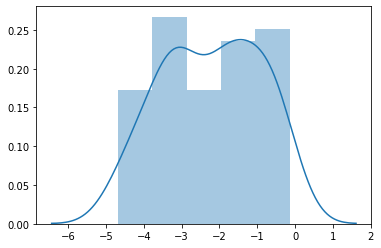

In [9]:
t_1 = CWGP("box_cox",n=2)
p_1 = t_1.fit(rate).x
x_1, d = t_1.phi.comp_phi(p_1,rate)
sns.distplot(x_1)

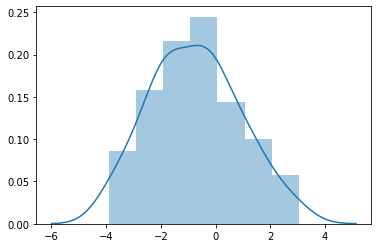

In [10]:
t_2 = CWGP("sa",n=2)
p_2 = t_2.fit(x_1).x
x_2, d = t_2.phi.comp_phi(p_2,x_1)
sns.distplot(x_2)


Name : GP regression
Objective : -2.337997488591803
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  Mat32.variance           |    13.256029118945914  |      +ve      |        
  Mat32.lengthscale        |     45.22315103043294  |      +ve      |        
  Gaussian_noise.variance  |  0.014133054667416241  |      +ve      |        


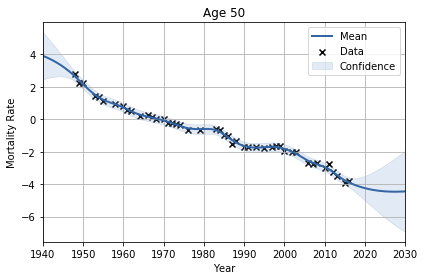

In [25]:
kernel = GPy.kern.Matern32(1)

X_train, X_test, y_train, y_test = train_test_split(dataset[:,0],dataset[:,1],test_size=0.33, random_state=42)

model_cwgp = GPy.models.GPRegression(X_train.reshape(-1,1),y_train.reshape(-1,1), kernel=kernel)
model_cwgp.optimize()
print(model_cwgp)
model_cwgp.plot(plot_limits=[1940,2030])

plt.title('Age ' + str(age))
plt.xlabel('Year')
plt.ylabel('Mortality Rate')

plt.grid(True)
plt.show()

In [87]:
data = []
start,end = 1940,2031
time_span = end-start
for i in range(start,end):
    data.append(model_cwgp.predict(np.array(i).reshape(1,-1)))
tr_data = np.array(data).reshape(-1,1,2)
tr_data = np.concatenate((tr_data, np.arange(start,end).reshape(-1,1,1)), axis=2)

In [88]:
tr_data

array([[[ 3.91025873e+00,  5.46994749e-01,  1.94000000e+03]],

       [[ 3.80712801e+00,  4.21367548e-01,  1.94100000e+03]],

       [[ 3.68998360e+00,  3.13516337e-01,  1.94200000e+03]],

       [[ 3.55788844e+00,  2.23655639e-01,  1.94300000e+03]],

       [[ 3.40985364e+00,  1.51649844e-01,  1.94400000e+03]],

       [[ 3.24483592e+00,  9.69344765e-02,  1.94500000e+03]],

       [[ 3.06173480e+00,  5.84254237e-02,  1.94600000e+03]],

       [[ 2.85938976e+00,  3.44145721e-02,  1.94700000e+03]],

       [[ 2.63657724e+00,  2.24501134e-02,  1.94800000e+03]],

       [[ 2.39666291e+00,  1.88628913e-02,  1.94900000e+03]],

       [[ 2.15680305e+00,  1.91437145e-02,  1.95000000e+03]],

       [[ 1.92185019e+00,  2.02815050e-02,  1.95100000e+03]],

       [[ 1.70053320e+00,  2.02688314e-02,  1.95200000e+03]],

       [[ 1.50377767e+00,  1.91838781e-02,  1.95300000e+03]],

       [[ 1.33939668e+00,  1.85895725e-02,  1.95400000e+03]],

       [[ 1.20469658e+00,  1.91433195e-02,  1.95500000e

In [108]:
CI = 1.96
mean = tr_data[:,:,[0,2]]
var_upper = mean + CI*np.sqrt(tr_data[:,:,1])
var_lower = mean - CI*np.sqrt(tr_data[:,:,1])
predict_mean = t_2.phi.inv_comp_phi(p_2,mean[:,0])
predict_mean = t_1.phi.inv_comp_phi(p_1,predict_mean[:,0])
predict_var_upper = t_2.phi.inv_comp_phi(p_2,var_upper)
predict_var_upper = t_1.phi.inv_comp_phi(p_1,predict_var_upper)
predict_var_lower = t_2.phi.inv_comp_phi(p_2,var_lower)
predict_var_lower = t_1.phi.inv_comp_phi(p_1,predict_var_lower)

(-0.01, 0.02)

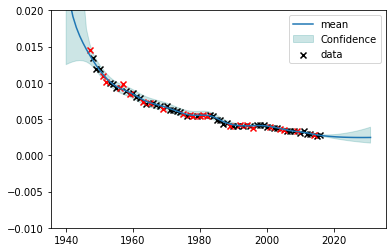

In [50]:
plt.fill_between(np.linspace(start,end,time_span),np.ravel(predict_var_upper),np.ravel(predict_var_lower),color=(0,0.5,0.5,0.2), label="Confidence")
plt.scatter(X_train, t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,y_train)), marker="x", color='black', label="data")
plt.scatter(X_test, t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,y_test)), marker="x", color='red')
plt.plot(np.linspace(start,end,time_span),predict_mean, label="mean")
plt.legend()
plt.ylim([-0.01,0.02])


In [120]:
mean

array([[[ 3.91025873e+00,  1.94000000e+03]],

       [[ 3.80712801e+00,  1.94100000e+03]],

       [[ 3.68998360e+00,  1.94200000e+03]],

       [[ 3.55788844e+00,  1.94300000e+03]],

       [[ 3.40985364e+00,  1.94400000e+03]],

       [[ 3.24483592e+00,  1.94500000e+03]],

       [[ 3.06173480e+00,  1.94600000e+03]],

       [[ 2.85938976e+00,  1.94700000e+03]],

       [[ 2.63657724e+00,  1.94800000e+03]],

       [[ 2.39666291e+00,  1.94900000e+03]],

       [[ 2.15680305e+00,  1.95000000e+03]],

       [[ 1.92185019e+00,  1.95100000e+03]],

       [[ 1.70053320e+00,  1.95200000e+03]],

       [[ 1.50377767e+00,  1.95300000e+03]],

       [[ 1.33939668e+00,  1.95400000e+03]],

       [[ 1.20469658e+00,  1.95500000e+03]],

       [[ 1.09924993e+00,  1.95600000e+03]],

       [[ 1.01225145e+00,  1.95700000e+03]],

       [[ 9.29801025e-01,  1.95800000e+03]],

       [[ 8.39541760e-01,  1.95900000e+03]],

       [[ 7.35220857e-01,  1.96000000e+03]],

       [[ 6.16136337e-01,  1.96100

In [125]:
t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,X_test))

array([2.04381803, 2.04379382, 2.04384737, 2.04379824, 2.04385276,
       2.04381365, 2.04380486, 2.04383003, 2.04384305, 2.04380706,
       2.04382785, 2.04380376, 2.04386671, 2.04379935, 2.04386135,
       2.04382676, 2.04385706, 2.04383221, 2.04385599, 2.04384521,
       2.04381145, 2.04383112, 2.0438398 , 2.04382458])

In [126]:
train_df = pd.DataFrame({"train":X_train,"test":t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,X_test)).reshape(-1)})
predict_df = pd.DataFrame({"year":mean[:,:,1].reshape(-1),"prediction": predict_mean})

ValueError: arrays must all be same length

In [122]:
train_df

,train,test
0,1954.0,1.399935
1,2000.0,-1.929422
2,1987.0,-1.497593
3,1991.0,-1.707328
4,1993.0,-1.700852
5,1966.0,0.238738
6,2003.0,-2.012027
7,1986.0,-1.038619
8,1972.0,-0.240829
9,1985.0,-0.992390


In [123]:
predict_df

,year,prediction
0,1940.0,0.026413
1,1941.0,0.021322
2,1942.0,0.019136
3,1943.0,0.017645
4,1944.0,0.016472
...,...,...
86,2026.0,0.002460
87,2027.0,0.002457
88,2028.0,0.002457
89,2029.0,0.002460


In [14]:
rmse = np.sqrt(np.sum((np.ravel(predict_mean[70:77])-df_all[age].rate[train_up:])**2)/n)
mae = np.sum(np.abs(np.ravel(predict_mean[70:77])-df_all[age].rate[train_up:]))/n

rmse,mae

(0.00047767063730228877, 0.00041550202604907137)